## <span style="color:#191970">1. Introdução sobre os dados</span>

Ao longo desse notebook iremos analisar alguns dados da Mega-Sena que vão desde o primeiro concurso em 11-03-1996 até o de 24-03-2018, totalizando um conjunto de informações referentes a 2025 concursos. Abaixo temos uma visualização dos dados presentes no dataset:

In [3]:
data.head()

,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


Mas, antes de começarmos a trabalhar com os dados, é importante fazer as importações das bibliotecas para auxiliar nas nossas análises:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

E precisamos também fazer a leitura devida do arquivo, como podemos vero no código baixo:

In [2]:
#atribuir o nome da planilha para a variável "arquivo"
arquivo = 'basedados.xlsx'

#carregar a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)

#carregar a planilha excel para um objeto dataframe
data = excel.parse(0)

## <span style="color:#191970">2. Existe um jeito mais vantajoso de escolher os números?</span>

Quando jogamos na Mega-Sena, existem diversos critérios que podem ser considerados na escolha dos números. Algumas pessoas optam por colocar a data de aniversário dos familiares, outras colocam os números que consideram ser o "seu número da sorte", outras simplesmente jogam números aleatórios...Mas existem também indivíduos que preferem desenvolver o seu jogo de uma maneira mais "matemática" e para isso criam **cálculos que se baseiam nos sorteios anteriores** para decidir quais números irão jogar. A grande questão que iremos discutir é: Será que esses cálculos podem ser relevantes de alguma forma? 

E para fazer essa análise, ao longo desse notebook, desenvolveremos um **método próprio** para a escolha de **4 números da Mega-Sena** e depois veremos se ele tem alguma relevância ou não, dependendo do quão eficiente ele teria sido nos jogos anteriores. 

<span style="color:##191970">**A hipótese do método é:** </span>
- <span style="color:#CD950C">**Se existe um número que aparece muitas vezes, mas que está há muito tempo sem aparecer, ele provavelmente irá aparecer em breve.**</span> Então, propomos o seguinte: se montarmos um jogo e nele colocarmos **4 números**que estejam entre os que **mais saíram nos concursos anteriores** e que também estão entre os números que **estão há mais rodadas seguidas sem sair, pelo menos 1 desses 4 números será sorteado**. 

<span style="color:##191970">**Para saber quais são os quatro números, devemos:**</span> 
- <span style="background-color:##E8E8E8; ">  Primeira Etapa:</span>  Montar uma **tabela com os números foram mais sorteados nos 10 concursos anteriores**, na qual o primeiro elemento é o número que mais saiu.
- <span style="background-color:##E8E8E8; ">  Segunda Etapa:</span>  Montar uma segunda **tabela com os números que estão a mais tempo sem ser sorteado até aquele concurso**, na qual o primeiro elemento é aquele que está a mais rodadas sem ser sorteado.
- <span style="background-color:##E8E8E8; ">  Terceira Etapa:</span>  Depois criaremos uma terceira **tabela onde iremos levar em consideração a soma:** <span style="color:#CD950C">**posição do número na primeira tabela + a posição do número na segunda tabela**</span>. Nesta tabela, o primeiro elemento será aquele que a soma deu o menor valor, ou seja, aquele que está numa posição relativamente mais acima na primeira e na segunda tabela.
- <span style="background-color:##E8E8E8; ">  Quarta Etapa:</span>  Feito isso, os **4 primeiros números** da terceira tabela serão os números escolhidos para serem jogados no concurso em questão.

Para entender melhor a lógica proposta vejamos um exemplo meramente ilustrativo:

<img width="600" alt="tabela1" src="https://drive.google.com/uc?export=view&id=1d-4Gm_DGPwlZxWQFcsAwOOmvBLdrKYMY">
<img width="600" alt="tabela1" src="https://drive.google.com/uc?export=view&id=1vDVRE2ghPGTKI1Pb6Udb5xSuRrwhA-xA">
<img width="600" alt="tabela1" src="https://drive.google.com/uc?export=view&id=1twxyhMeDkjy7kn2GOePJ2kQCLSJu8KUe">


<span style="color:##191970">**Para verificar a nossa hipótese vamos fazer o seguinte:** </span>
- Para cada concurso, após a escolha dos quatro números, veremos **quantas vezes pelo menos 1 dos 4 números foi, de fato, sorteado**, verificando se o método foi eficiente ou não. E então, calcularemos em **quantos porecento do total de concursos** o objetivo de acertar 1 número foi atingido. Assim, será possível visualizar o quão relevante esse processo de fato seria na escolha dos números da Mega-Sena.


### <span style="color:##191970">2.1. Construindo a lógica de cada etapa</span>

#### <span style="color:##191970">a) Montando a Tabela 1</span>

>```python
#criar uma lista para guardar os valores sorteados
n_sorteados=[]
#criar a variável o que vai armazenar o número do concurso
c = concurso_i
#atribuir a 'colunas' as colunas que contém os números sorteados em cada concurso
colunas = ['Dezena1','Dezena2', 'Dezena3', 'Dezena4' , 'Dezena5', 'Dezena6']
#como iremos utilizar apenas os 10 valores anteriores
#atribuir para 'a' o número do décimo concurso anterior ao que estamos avaliando
a = c-10 
if a < 0: #caso a seja menor que 0
    a = 0 #o concurso analisado é um dos primeiros, logo devo zerar o valor de a
#percorrer concursos anteriores    
for i in range(a,c): 
    for k in colunas: #percorrer cada uma das colunas das dezenas
      j = data[k].iloc[i] #descobrir o valor sorteado naquela dezena 
        n_sorteados.append(j) #adicionar ao n_sorteados o valor descoberto 
#criar o dicionário para as apariçoes de cada número         
aparicoes={}   
#para cada valor sorteado
for i in set(n_sorteados):
    aparicoes[i] = n_sorteados.count(i) #dizer quantas vezes ele aparece    
chaves = [] #criar uma lista para receber as chaves
valores = [] #criar uma lista para receber os valores
#para cada item em aparições
for i,j in aparicoes.items():
    chaves.append(i) #adicionar os valores da lista chave
    valores.append(j) #adivionar os valores da lista value
#criar um dicionário B com os valores das chavez e dos valores
B = {'Numero':chaves, 'Repeticoes':valores} 
#criar um dataframe que será a tabela 1 
tab1= pd.DataFrame(data = B) 
#ordenar o DataFrame pelo número de aparições e do maior para o menor
tab1 = tab1.sort_values(by=['Repeticoes'], ascending = False)
```

#### <span style="color:##191970">b) Montando a Tabela 2</span>

>```python
#criar dicionário para armazenar a última aparição do número
ultima_aparicao = {} 
#para cada número
for j in set(n_sorteados): 
    for i in range(c): #do primeiro ao ultimo concurso
        for k in colunas: #para cada dezena
            if j == data[k].iloc[i]: #se o i for igual a uma das dezenas sorteadas 
                ultima_aparicao[j] = data['Data Sorteio'].iloc[i] #colocar data do concurso no dicionário
#criar uma lista para receber as chaves
chaves = [] 
#criar uma lista para receber os valores
valores = [] 
#para cada item do dicionário
for i,j in ultima_aparicao.items():
    chaves.append(i) #adicionar as keys na lista chave
    valores.append(j) #adivionar os values na lista value 
#criar um dicionário C com os valores das chavez e dos valores
C = {'Numero':chaves, 'Última Aparição':valores} 
#criar um dataframe que será a tabela 2
tab2 = pd.DataFrame(data=C) 
#ordenar o DataFrame pelo ultima aparição da mais antiga para a mais atual
tab2 = tab2.sort_values('Última Aparição') 
```


#### <span style="color:##191970">c) Montando a Tabela 3</span>

>```python
soma_posicoes = {} #criar dicionário para armazenar as somas
posicao_tab1 = {} #criar dicionário para armazenar as posições da tabela1
posicao_tab2 = {} #criar dicionário para armazenar as posições da tabela2
#para cada valor sorteado
for j in set(n_sorteados):
    index_tab1 = pd.Index(tab1.Numero)
    posicao_tab1[j] = index_tab1.get_loc(j)#pegar a posição do j na tabela 1    
#para cada valor sorteado
for j in set(n_sorteados):
    index_tab2 = pd.Index(tab2.Numero)
    posicao_tab2[j] = index_tab2.get_loc(j)#pegar a posição do j na tabela 2
#para cada valor sorteado   
for i in set(n_sorteados):    
    soma_posicoes[i]= posicao_tab1[i] + posicao_tab2[i] #adicionar a soma da posição nas tabelas 
#criar uma lista para receber as chaves
chaves = [] 
#criar uma lista para receber os valores
valores = [] 
#para cada item do dicionário
for i,j in soma_posicoes.items():
    chaves.append(i) #adicionar os valores da lista chave
    valores.append(j) #adivionar os valores da lista value    
#cria um dicionário D com os valores das chaves e dos valores
D = {'Numero':chaves, 'Soma das posições':valores} 
 #criar um dataframe que será a tabela 3
tab3 = pd.DataFrame(data=D) 
#ordenamar o dataframe pelo número de aparições e do menor para o maior
tab3 = tab3.sort_values('Soma das posições') 
```

#### <span style="color:##191970">d) Escolhendo os 4 Números</span>

>```python
#na coluna Numero da tabela 3 , busco os 4 primeiros valores
Quatro_numeros= tab3.Numero.iloc[0:4].tolist()
```




#### <span style="color:##191970">e) Verificando se um dos números foi sorteado</span>

>```python
for i in colunas:#para cada dezena
    for j in Quatro_numeros: #para cada palpite
        if j == data[i].loc[c]: #verificar se naquele concurso o palpite foi certo
            data['Acertos Palpite'][c]+=1 #somar na coluna 'Acertos Palpite'
```


### <span style="color:##191970">2.2 Aplicando em todos os concursos</span>

Agora que já temos a lógica para a construção de cada uma das etapas iremos junta-las numa única célula para podermos aplicar o método a cada um dos concursos.

In [5]:
#Adicionar a coluna ao dataset, com todos os valore iguais a 0
for i in data:
    data['Acertos Palpite']= 0 

#percorrer todas as colunas    
for x in range(2025):
    n_sorteados=[]
    c = x
    a = c-10 
    if a <0:
        a=0
        
    #código para descobrir a tabela 1
    colunas = ['Dezena1','Dezena2', 'Dezena3', 'Dezena4' , 'Dezena5', 'Dezena6']
    for i in range(a,c): 
        for k in colunas:
            j = data[k].iloc[i] 
            n_sorteados.append(j) 
    aparicoes={}  
    for i in set(n_sorteados): 
        aparicoes[i] = n_sorteados.count(i)   
    chaves = [] 
    valores = [] 
    for i,j in aparicoes.items():
        chaves.append(i)
        valores.append(j) 
    B = {'Numero':chaves, 'Repeticoes':valores} 
    tab1= pd.DataFrame(data = B) 
    tab1 = tab1.sort_values(by=['Repeticoes'], ascending = False) 
    
    #código para descobrir a tabela 2
    ultima_aparicao = {}
    for j in set(n_sorteados): 
        for i in range(a,c):
            for k in colunas:
                if j == data[k].iloc[i]:  
                    ultima_aparicao[j] = data['Data Sorteio'].iloc[i]
    chaves = [] 
    valores = [] 
    for i,j in ultima_aparicao.items():
        chaves.append(i) 
        valores.append(j)
    C = {'Numero':chaves, 'Última Aparição':valores} 
    tab2 = pd.DataFrame(data=C) 
    tab2 = tab2.sort_values('Última Aparição') 
    
    #código para descobrir tabela 3
    soma_posicoes = {}
    posicao_tab1 = {}
    posicao_tab2 = {}
    for j in set(n_sorteados): 
        index_tab1 = pd.Index(tab1.Numero)
        posicao_tab1[j] = index_tab1.get_loc(j) 
    for j in set(n_sorteados):
        index_tab2 = pd.Index(tab2.Numero)
        posicao_tab2[j] = index_tab2.get_loc(j)
    for i in set(n_sorteados):    
        soma_posicoes[i]= posicao_tab1[i] + posicao_tab2[i]
    chaves = [] 
    valores = []
    for i,j in soma_posicoes.items():
        chaves.append(i) 
        valores.append(j)
    D = {'Numero':chaves, 'Soma das posições':valores}
    tab3 = pd.DataFrame(data=D)
    tab3 = tab3.sort_values('Soma das posições')
    
    #escolher os 4 Números
    Quatro_numeros= tab3.Numero.iloc[0:4].tolist()
    
    #Verificar e colocar na coluna Acertos Palpite
    for i in colunas:
        for j in Quatro_numeros:
            if j == data[i].loc[c]:
                data['Acertos Palpite'][c]+=1
    
 
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### <span style="color:##191970">2.3 Vendo a Eficiência do Método</span>

#### <span style="color:##191970">a) Criando uma nova tabela</span>

In [6]:
#calcular em quantos porcento do total o método acertou 0, 1, 2 ou 3 números
tab_eficiencia = data.pivot_table(index="Acertos Palpite", #atribuir o index a Acertos Palpite
                 values = "Concurso", #Atribuir os valores a concurso
                 aggfunc=lambda x: 100*(len(x)/len(data))) #calcular a porcentagem

#alterar o nome da coluna Concurso para Porcentagem
tab_eficiencia.rename(columns={'Concurso':'Porcentagem'}, inplace=True)
tab_eficiencia

,Porcentagem
Acertos Palpite,
0,64.098765
1,31.407407
2,4.345679
3,0.148148


- Diante da tabela acima,percebemos que o algorítimo na verdade é bem interessante, pois ele teria nos ajudado a acertar pelo menos 1 número em aproximadamente 35% dos concursos. 

#### <span style="color:##191970">b) Gerando um gráfico</span>

Text(0,0.5,'Porcentagem do Total')

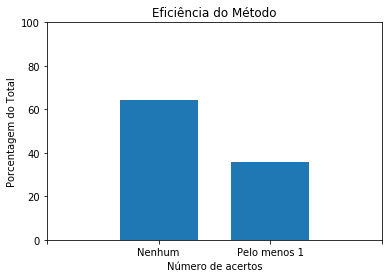

In [7]:
#gerar um subplot
fig, ax = plt.subplots() 

#utilizar arrange para definir o número de barras
from numpy import arange
bar_posicoes = arange(2) + 1  

#atribuir a linhas, as labels que iremos utilizar
linhas=['','Nenhum', 'Pelo menos 1', '']

#atribir a bar_altura, a porcentagem de 0 e aporcentagem de 1 a 3 acertos
bar_altura = [tab_eficiencia['Porcentagem'][0],tab_eficiencia['Porcentagem'][1:3].sum()]#Trazendo o valor da porcentagem

#definir quantas posições terá o plot
ticks_posicao= range(0,4)

#configurar posição, a altura e o espaçamento das barras
ax.bar(bar_posicoes, bar_altura, 0.7) 

#atribuir as labels e as suas posiçoes
ax.set_xticklabels(linhas) 
ax.set_xticks(ticks_posicao) 

#definir a altura do eixo y
ax.set_ylim(0, 100) 

#Alterar o título e informaçoes do plot
plt.title('Eficiência do Método')
plt.xlabel('Número de acertos')
plt.ylabel('Porcentagem do Total')



- O gráfico acima reforça de uma maneira mais visual o que já foi apresentado no item anterior:**a diferença entre a porcentagem de nenhum acerto e a porcentagem de pelo menos 1 acerto na aposta do número não é tão grande assim**. E assim verificamos que a aplicação do método, teve, sim, uma certa relevância, pois em uma parcela expressiva dos concursos ele teria nos ajudado a acertar pelo menos  1 dos números.

## <span style="color:##191970">3. Conclusão</span>

Como a Mega-Sena se trata de um jogo de azar, infelizmente, afirmar que existe um método de escolha que **é** mais vantajoso ou afirmar que podemos **prever** os números que serão sorteados não é algo que podemos fazer. No entanto, diante das análises que foram apresentadas ao longo desse notebook, somos capazes de dizer que para os jogos anteriores o método proposto **foi**, de certa forma, vantajoso e que muitos dos números que **prevemos**, de fato foram sorteados. Sendo assim, podemos concluir que a aplicação de uma lógica na escolha dos números da Mega-sena nem sempre será algo inútil ou irrelevante como muitos pensam que é, e que pode ser bem interessante desenvolver um raciocínio para o jogo quando se tem tantos dados disponíveis para serem estudados. 
